### Introduction

In today's rapidly evolving tech field, Python has emerged as a well sorted language, driving innovation across industries worldwide. Recognizing the significance of Python proficiency, this project delves into the job market landscape in the Middle East, specifically focusing on Python-related roles. By scraping job listings from Wuzzuf, a prominent online job portal, I aim to gain insights into the demand for Python talent, the diversity of job opportunities, and the geographical distribution of these roles across the region.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import csv
from itertools import zip_longest

In [2]:
#using requests to fetch the url
result =requests.get('https://wuzzuf.net/search/jobs/?q=python&a=hpb')

In [3]:
#save page content
src =result.content

In [4]:
##creating soup object to parse content

soup =BeautifulSoup(src,'lxml')

In [5]:
job_titles = soup.find_all("h2", {"class": "css-m604qf"})
company_name = soup.find_all("a", {"class": "css-17s97q8"})
location = soup.find_all("span", {"class": "css-5wys0k"})
job_skills = soup.find_all("div", {"class": "css-y4udm8"})


In [6]:

#creating  empty lists to house the scrapped data
job_title_list = []
company_name_list = []
location_list = []
job_skills_list = []

In [7]:
for i in range(len(location)):
  job_title_list.append(job_titles[i].text)
  company_name_list.append(company_name[i].text)
  location_list.append(location[i].text)
  job_skills_list.append(job_skills[i].text)

In [8]:
#defining the path of the csv file:

file_path = "C:\\Users\\Nana Ekua\\Desktop\\TECH4DEV\\jobs_scraped_data.csv"   

# all the features:
file_list = [job_title_list, company_name_list,location_list,  job_skills_list]
exported = zip_longest(*file_list)

with open(file_path, "w", newline= '', encoding= "utf-8") as csvfile:

  # creating a csv writer object to write in the file
  csv_writer = csv.writer(csvfile)

  # # writing data to the csv file
  csv_writer.writerow(["job title", "company name", "location", "skills"])
  csv_writer.writerows(exported)

In [9]:
#reading my data

df=pd.read_csv("C:\\Users\\Nana Ekua\\Desktop\\TECH4DEV\\jobs_scraped_data.csv" )
df

,job title,company name,location,skills
0,Senior python backend developer,Pioneers Now -,"Nasr City, Cairo, Egypt",Full TimeHybridExperienced · 3 - 5 Yrs of Exp ...
1,Python Developer,Digizilla -,"Nasr City, Cairo, Egypt",Full TimeHybridEntry Level · 0 - 3 Yrs of Exp ...
2,Python Developer,Ensofia -,"Heliopolis, Cairo, Egypt",Full TimeRemoteExperienced · 4 - 6 Yrs of Exp ...
3,Python Backend Developer,Geek Labs -,"Maadi, Cairo, Egypt",Full TimeOn-siteEntry Level · 2+ Yrs of Exp · ...
4,AI & Data Science Python Developer Intern,Sequel Solutions -,"Cairo, Egypt",InternshipRemoteStudent · 0 - 1 Yrs of Exp · I...
5,Python Backend Developer Internship,Geek Labs -,"Maadi, Cairo, Egypt",InternshipOn-siteEntry Level · IT/Software Dev...
6,Senior Python Developer,Trufla -,"Cairo, Egypt",Full TimeHybridExperienced · 4+ Yrs of Exp · I...
7,Python Developer,Confidential -,"Cairo, Egypt",Full TimeOn-siteExperienced · 4 - 6 Yrs of Exp...
8,Senior Software Engineer- Team Lead,JRM for Communications -,"Nasr City, Cairo, Egypt",Full TimeHybridExperienced · 4 - 6 Yrs of Exp ...
9,Machine Learning Researcher,RDI -,"Dokki, Giza, Egypt",Full TimeHybridEntry Level · 0 - 3 Yrs of Exp ...


In [10]:
df.shape

(15, 4)

### Data Cleaning

In [11]:
import re


data = {
    'title': [
        "Senior python backend developer", "Python Developer", "Python Developer",
        "Python Backend Developer", "AI & Data Science Python Developer Intern",
        "Python Backend Developer Internship", "Senior Python Developer", "Python Developer",
        "Senior Software Engineer- Team Lead", "Machine Learning Researcher", "Odoo Developer",
        "Senior Data Architect", "Machine Learning Engineer", "AI Engineer Lead", "Odoo Developer"
    ],
    'company name': [
        "Pioneers Now -", "Digizilla -", "Ensofia -", "Geek Labs -", "Sequel Solutions -",
        "Geek Labs -", "Trufla -", "Confidential -", "JRM for Communications -", "RDI -",
        "Cube Master -", "APS Resources -", "HackerPulse -", "Block Gemini -", "Smart Line -"
    ],
    'location': [
        "Nasr City, Cairo, Egypt", "Nasr City, Cairo, Egypt", "Heliopolis, Cairo, Egypt",
        "Maadi, Cairo, Egypt", "Cairo, Egypt", "Maadi, Cairo, Egypt", "Cairo, Egypt", 
        "Cairo, Egypt", "Nasr City, Cairo, Egypt", "Dokki, Giza, Egypt", "Al Ahsa, Saudi Arabia", 
        "Giza, Egypt", "Riyadh, Saudi Arabia", "Cairo, Egypt", "Nasr City, Cairo, Egypt"
    ],
    'skills': [
        "Full TimeHybridExperienced · 3 - 5 Yrs of Exp · Business Development · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development",
        "Full TimeHybridEntry Level · 0 - 3 Yrs of Exp · Business Development · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development",
        "Full TimeRemoteExperienced · 4 - 6 Yrs of Exp · Business Development · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development",
        "Full TimeOn-siteEntry Level · 2+ Yrs of Exp · Business Development · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development",
        "InternshipRemoteStudent · 0 - 1 Yrs of Exp · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development",
        "InternshipOn-siteEntry Level · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development",
        "Full TimeHybridExperienced · 4+ Yrs of Exp · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development",
        "Full TimeOn-siteExperienced · 4 - 6 Yrs of Exp · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development",
        "Full TimeHybridExperienced · 4 - 6 Yrs of Exp · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development",
        "Full TimeHybridEntry Level · 0 - 3 Yrs of Exp · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development",
        "Full TimeRemoteExperienced · 2+ Yrs of Exp · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development",
        "Part TimeFreelance / ProjectRemoteExperienced · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development",
        "Full TimeRemoteEntry Level · 1 - 3 Yrs of Exp · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development",
        "Full TimeOn-siteExperienced · 6 - 10 Yrs of Exp · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development",
        "Full TimeOn-siteExperienced · 1 - 3 Yrs of Exp · IT/Software Development · Marketing/PR/Advertising · backend · Software · Software Development · Web Development"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to clean and split the skills column
def clean_and_split_skills(row):
    # Extract Time Type (Full Time, Part Time, etc.)
    time_type = re.search(r'(Full Time|Part Time|Freelance|Internship)', row, re.IGNORECASE)
    time_type = time_type.group(0) if time_type else None

    # Extract Job Type
    job_type = []
    if 'Remote' in row:
        job_type.append('Remote')
    if 'Hybrid' in row:
        job_type.append('Hybrid')
    if 'On-site' in row:
        job_type.append('On-site')
    if 'Freelance' in row:
        job_type.append('Freelance')
    job_type = ', '.join(job_type) if job_type else None

    # Extract Experience Level
    experience_level = []
    if 'Experienced' in row:
        experience_level.append('Experienced')
    if 'Entry Level' in row:
        experience_level.append('Entry Level')
    if 'Student' in row:
        experience_level.append('Student')
    experience_level = ', '.join(experience_level) if experience_level else None

    # Extract Years of Experience
    years_of_exp = re.search(r'(\d+\s*-\s*\d+\s*Yrs of Exp|\d+\+\s*Yrs of Exp)', row)
    years_of_exp = years_of_exp.group(0) if years_of_exp else None

    # Extract Skills
    skills = re.split(r' Â· ', row)
    # Remove known items from skills list
    skills = [skill for skill in skills if not re.search(r'(Full Time|Part Time|Freelance|Internship|Remote|Hybrid|On-site|Experienced|Entry Level|Student|\d+\s*-\s*\d+\s*Yrs of Exp|\d+\+\s*Yrs of Exp)', skill, re.IGNORECASE)]
    skills = ' Â· '.join(skills).strip()

    return pd.Series([time_type, job_type, experience_level, years_of_exp, skills])

# Apply function to each row in the skills column
df[['Engagement Time', 'Job Type', 'Experience Level', 'Years of Experience', 'Skills']] = df['skills'].apply(clean_and_split_skills)

# Drop the original skills column
df.drop(columns=['skills'], inplace=True)

# Print the cleaned DataFrame
print(df)


                                        title              company name  \
0             Senior python backend developer            Pioneers Now -   
1                            Python Developer               Digizilla -   
2                            Python Developer                 Ensofia -   
3                    Python Backend Developer               Geek Labs -   
4   AI & Data Science Python Developer Intern        Sequel Solutions -   
5         Python Backend Developer Internship               Geek Labs -   
6                     Senior Python Developer                  Trufla -   
7                            Python Developer            Confidential -   
8         Senior Software Engineer- Team Lead  JRM for Communications -   
9                 Machine Learning Researcher                     RDI -   
10                             Odoo Developer             Cube Master -   
11                      Senior Data Architect           APS Resources -   
12                  Machi

In [12]:
df

,title,company name,location,Engagement Time,Job Type,Experience Level,Years of Experience,Skills
0,Senior python backend developer,Pioneers Now -,"Nasr City, Cairo, Egypt",Full Time,Hybrid,Experienced,3 - 5 Yrs of Exp,
1,Python Developer,Digizilla -,"Nasr City, Cairo, Egypt",Full Time,Hybrid,Entry Level,0 - 3 Yrs of Exp,
2,Python Developer,Ensofia -,"Heliopolis, Cairo, Egypt",Full Time,Remote,Experienced,4 - 6 Yrs of Exp,
3,Python Backend Developer,Geek Labs -,"Maadi, Cairo, Egypt",Full Time,On-site,Entry Level,2+ Yrs of Exp,
4,AI & Data Science Python Developer Intern,Sequel Solutions -,"Cairo, Egypt",Internship,Remote,Student,0 - 1 Yrs of Exp,
5,Python Backend Developer Internship,Geek Labs -,"Maadi, Cairo, Egypt",Internship,On-site,Entry Level,None,
6,Senior Python Developer,Trufla -,"Cairo, Egypt",Full Time,Hybrid,Experienced,4+ Yrs of Exp,
7,Python Developer,Confidential -,"Cairo, Egypt",Full Time,On-site,Experienced,4 - 6 Yrs of Exp,
8,Senior Software Engineer- Team Lead,JRM for Communications -,"Nasr City, Cairo, Egypt",Full Time,Hybrid,Experienced,4 - 6 Yrs of Exp,
9,Machine Learning Researcher,RDI -,"Dokki, Giza, Egypt",Full Time,Hybrid,Entry Level,0 - 3 Yrs of Exp,


In [13]:
df['company name'] = df['company name'].str.replace(r'\s*-\s*$', '', regex=True)

In [14]:
df['Years of Experience'] = df['Years of Experience'].str.replace(' Yrs of Exp', ' Yrs')


In [15]:
df

,title,company name,location,Engagement Time,Job Type,Experience Level,Years of Experience,Skills
0,Senior python backend developer,Pioneers Now,"Nasr City, Cairo, Egypt",Full Time,Hybrid,Experienced,3 - 5 Yrs,
1,Python Developer,Digizilla,"Nasr City, Cairo, Egypt",Full Time,Hybrid,Entry Level,0 - 3 Yrs,
2,Python Developer,Ensofia,"Heliopolis, Cairo, Egypt",Full Time,Remote,Experienced,4 - 6 Yrs,
3,Python Backend Developer,Geek Labs,"Maadi, Cairo, Egypt",Full Time,On-site,Entry Level,2+ Yrs,
4,AI & Data Science Python Developer Intern,Sequel Solutions,"Cairo, Egypt",Internship,Remote,Student,0 - 1 Yrs,
5,Python Backend Developer Internship,Geek Labs,"Maadi, Cairo, Egypt",Internship,On-site,Entry Level,None,
6,Senior Python Developer,Trufla,"Cairo, Egypt",Full Time,Hybrid,Experienced,4+ Yrs,
7,Python Developer,Confidential,"Cairo, Egypt",Full Time,On-site,Experienced,4 - 6 Yrs,
8,Senior Software Engineer- Team Lead,JRM for Communications,"Nasr City, Cairo, Egypt",Full Time,Hybrid,Experienced,4 - 6 Yrs,
9,Machine Learning Researcher,RDI,"Dokki, Giza, Egypt",Full Time,Hybrid,Entry Level,0 - 3 Yrs,


In [16]:
df.drop(columns=['Skills'], inplace=True)


### Exploratory Data Analysis

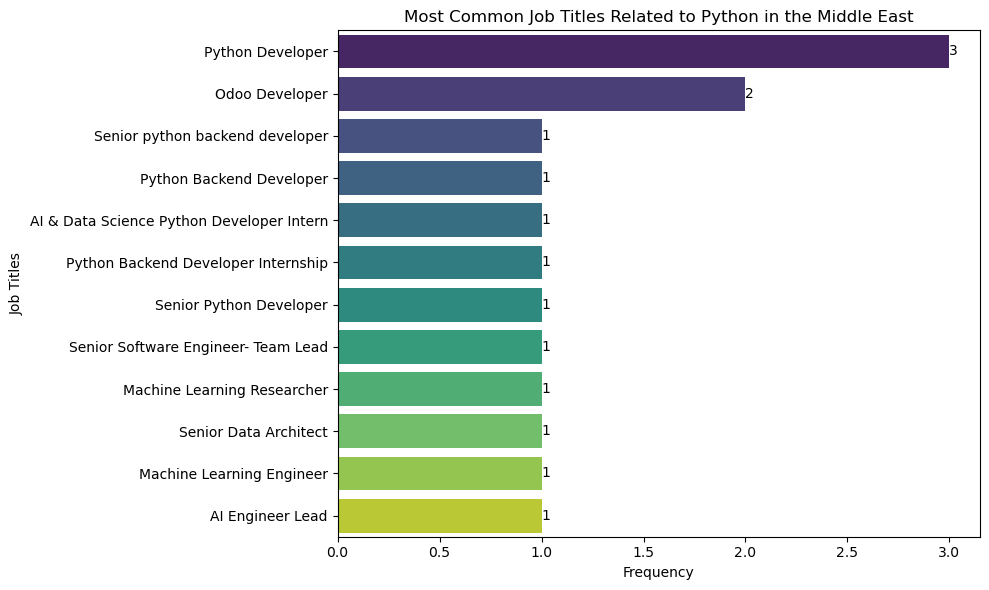

In [17]:
job_title_counts = df['title'].value_counts().reset_index()
job_title_counts.columns = ['title', 'count']

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=job_title_counts, x='count', y='title', palette='viridis')

# Adding data labels
for container in ax.containers:
    ax.bar_label(container)

plt.title('Most Common Job Titles Related to Python in the Middle East')
plt.xlabel('Frequency')
plt.ylabel('Job Titles')
plt.tight_layout()
plt.show()

From the chart above , we can notice that "Python Developer" isthe most sort after job description or title in the on the Wuzzuf platform.

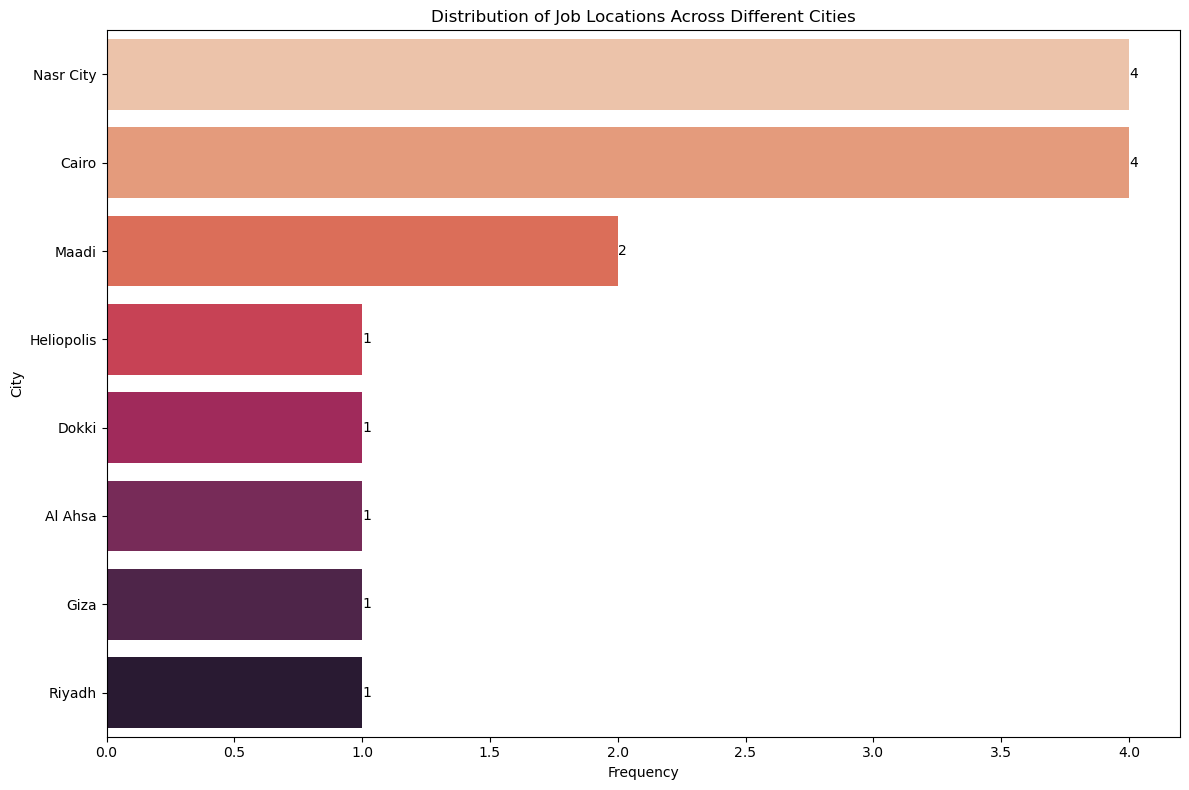

In [18]:
df['city'] = df['location'].apply(lambda x: x.split(',')[0])

# Count the frequency of each city
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=city_counts, x='count', y='city', palette='rocket_r')

# Adding data labels
for container in ax.containers:
    ax.bar_label(container)

plt.title('Distribution of Job Locations Across Different Cities')
plt.xlabel('Frequency')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Notably Nasr City and Cairo has the highest number of job listings.

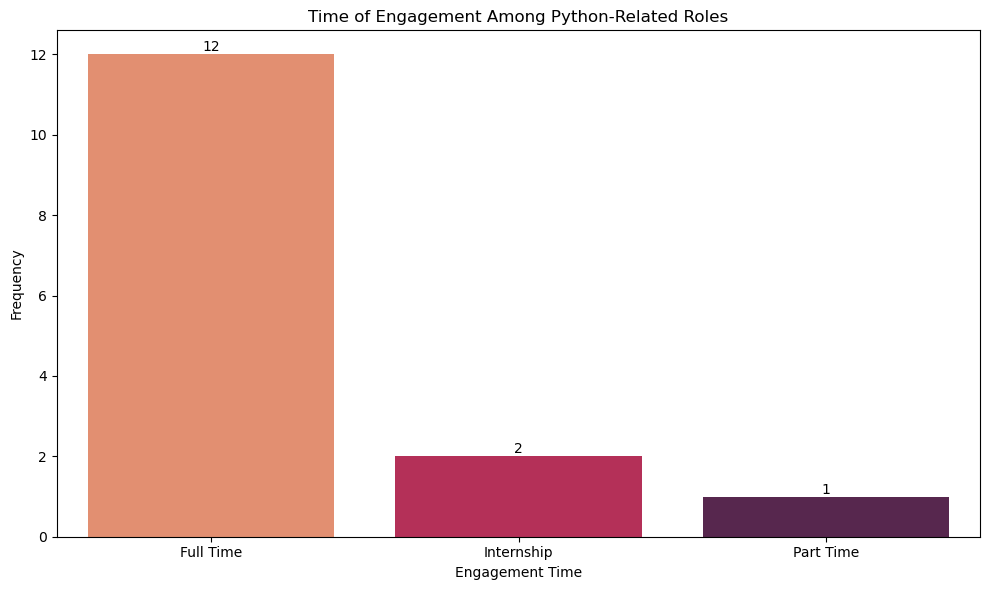

In [19]:
job_type_counts = df['Engagement Time'].value_counts().reset_index()
job_type_counts.columns = ['Engagement Time', 'count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=job_type_counts, x='Engagement Time', y='count', palette='rocket_r')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Time of Engagement Among Python-Related Roles')
plt.xlabel('Engagement Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Most of the jobs are Full time jobs

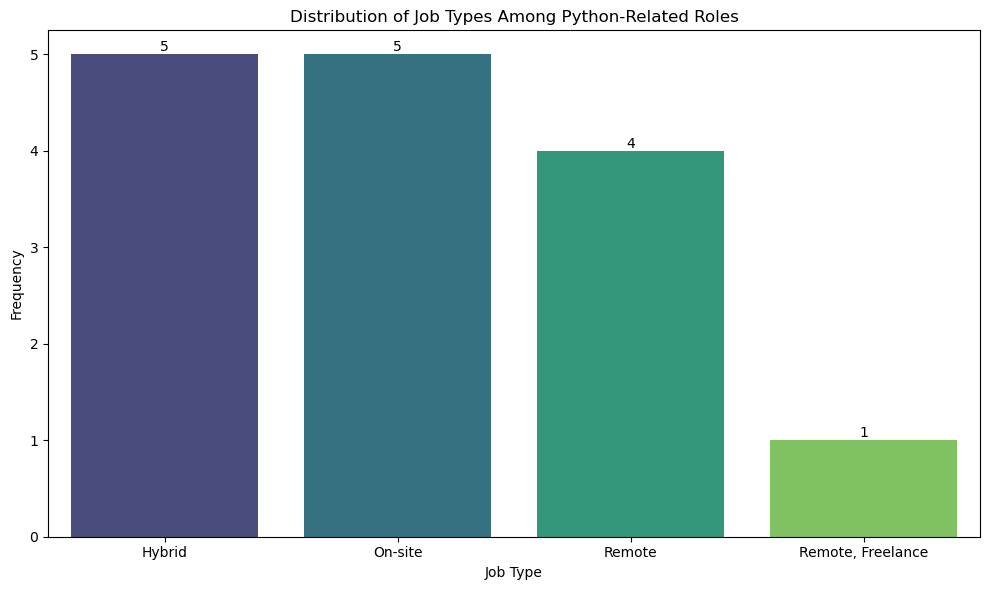

In [20]:
job_type_counts = df['Job Type'].value_counts().reset_index()
job_type_counts.columns = ['Job Type', 'count']

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=job_type_counts, x='Job Type', y='count', palette='viridis')

# Adding data labels
for container in ax.containers:
    ax.bar_label(container)

plt.title('Distribution of Job Types Among Python-Related Roles')
plt.xlabel('Job Type')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Most of the jobs are either hybrid or require the propesctive job seeker to be on-site

  Experience Level  Years of Experience Num
0      Entry Level                      1.0
1      Experienced                      4.0
2          Student                      0.0


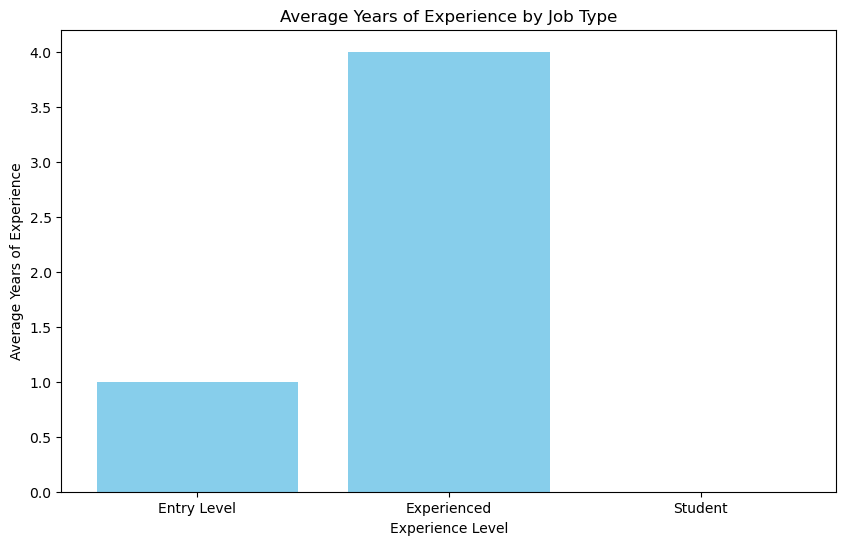

In [23]:


data = {
    'title': [
        'Senior python backend developer', 'Python Developer', 'Python Developer', 'Python Backend Developer',
        'AI & Data Science Python Developer Intern', 'Python Backend Developer Internship', 'Senior Python Developer',
        'Python Developer', 'Senior Software Engineer- Team Lead', 'Machine Learning Researcher', 'Odoo Developer',
        'Senior Data Architect', 'Machine Learning Engineer', 'AI Engineer Lead', 'Odoo Developer'
    ],
    'company name': [
        'Pioneers Now', 'Digizilla', 'Ensofia', 'Geek Labs', 'Sequel Solutions', 'Geek Labs', 'Trufla',
        'Confidential', 'JRM for Communications', 'RDI', 'Cube Master', 'APS Resources', 'HackerPulse',
        'Block Gemini', 'Smart Line'
    ],
    'location': [
        'Nasr City, Cairo, Egypt', 'Nasr City, Cairo, Egypt', 'Heliopolis, Cairo, Egypt', 'Maadi, Cairo, Egypt', 'Cairo, Egypt',
        'Maadi, Cairo, Egypt', 'Cairo, Egypt', 'Cairo, Egypt', 'Nasr City, Cairo, Egypt', 'Dokki, Giza, Egypt',
        'Al Ahsa, Saudi Arabia', 'Giza, Egypt', 'Riyadh, Saudi Arabia', 'Cairo, Egypt', 'Nasr City, Cairo, Egypt'
    ],
    'Engagement Time': [
        'Full Time', 'Full Time', 'Full Time', 'Full Time', 'Internship', 'Internship', 'Full Time',
        'Full Time', 'Full Time', 'Full Time', 'Full Time', 'Part Time', 'Full Time', 'Full Time',
        'Full Time'
    ],
    'Job Type': [
        'Hybrid', 'Hybrid', 'Remote', 'On-site', 'Remote', 'On-site', 'Hybrid', 'On-site', 'Hybrid', 'Hybrid',
        'Remote', 'Remote, Freelance', 'Remote', 'On-site', 'On-site'
    ],
    'Experience Level': [
        'Experienced', 'Entry Level', 'Experienced', 'Entry Level', 'Student', 'Entry Level',
        'Experienced', 'Experienced', 'Experienced', 'Entry Level', 'Experienced', 'Experienced',
        'Entry Level', 'Experienced', 'Experienced'
    ],
    'Years of Experience': [
        '3 - 5 Yrs', '0 - 3 Yrs', '4 - 6 Yrs', '2+ Yrs', '0 - 1 Yrs', '0 - 0 Yrs', '4+ Yrs',
        '4 - 6 Yrs', '4 - 6 Yrs', '0 - 3 Yrs', '2+ Yrs', '0 - 0 Yrs', '1 - 3 Yrs', '6 - 10 Yrs',
        '1 - 3 Yrs'
    ],
    'city': [
        'Nasr City', 'Nasr City', 'Heliopolis', 'Maadi', 'Cairo', 'Maadi', 'Cairo', 'Cairo',
        'Nasr City', 'Dokki', 'Al Ahsa', 'Giza', 'Riyadh', 'Cairo', 'Nasr City'
    ]
}

df = pd.DataFrame(data)

# Helper function to convert "Years of Experience" to a numerical value
def convert_experience(exp):
    if pd.isna(exp) or exp == '0 - 0 Yrs':
        return 0
    elif '+' in exp:
        return float(exp.replace('+ Yrs', ''))
    else:
        return np.mean([float(e) for e in exp.replace(' Yrs', '').split(' - ')])

df['Years of Experience Num'] = df['Years of Experience'].apply(convert_experience)

# Group by "Experience Level" and calculate the average years of experience
experience_by_level = df.groupby('Experience Level')['Years of Experience Num'].mean().round(0).reset_index()

# Print the results
print(experience_by_level)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.bar(experience_by_level['Experience Level'], experience_by_level['Years of Experience Num'], color='skyblue')
plt.xlabel('Experience Level')
plt.ylabel('Average Years of Experience')
plt.title('Average Years of Experience by Job Type')
plt.show()


Averagely a prospective applicant needs an experience of 1year for Entry level jobs, 4years of experience for an experienced level job and no years of expereince (0) for an student or internship level jobs 

### Insights


Popular Job Titles: From the chart, it is evident that "Python Developer" is the most sought-after job title on the Wuzzuf platform. This indicates a high demand for Python development skills in the job market.

Job Location Concentration: Notably, Nasr City and Cairo have the highest number of job listings. This suggests that these cities are significant hubs for Python-related roles, providing ample opportunities for job seekers in these areas.

Full-Time Jobs Dominance: The majority of the jobs listed are full-time positions. This trend reflects a preference for stable, long-term employment among employers on the Wuzzuf platform.

Job Type Preference: Most of the jobs are either hybrid or require the prospective job seeker to be on-site. This indicates a preference for flexible working arrangements or traditional office settings among employers.

Experience Requirements: On average, a prospective applicant needs:

1 year of experience for entry-level jobs: This requirement is relatively low, making it accessible for recent graduates or those new to the field.
4 years of experience for experienced-level jobs: This indicates a higher skill and expertise level required for these positions.
No years of experience (0) for student or internship level jobs: This opens up opportunities for students and fresh graduates to gain industry experience without prior work experience.

### Conclusion

The analysis of Python-related job listings on the Wuzzuf platform reveals significant trends in job titles, locations, job types, and experience requirements. "Python Developer" stands out as the most demanded role, with Nasr City and Cairo being prime locations for such opportunities. Full-time and hybrid or on-site job types are prevalent, indicating a blend of traditional and flexible work arrangements. The experience requirements vary, making the job market accessible to both fresh graduates and seasoned professionals. These insights can guide job seekers in tailoring their applications and career planning according to market demands.